In [1]:
import sys
import os
import glob as gb
sys.path.append('/home/cbenitez/')
import MTmp as mt
import matplotlib.pyplot as plt
import numpy as np
import oort_cons as oc

amrviewer GUI ImportError : are WxPython and PyTables correctly installed?


In [2]:
cd /fs/nas14/other0/cbenitez/evolsOC/

/fs/nas14/other0/cbenitez/evolsOC


### Experimento 3

In [3]:
ls

evols_exp_central.npy              gra_AvsC_quiv_6.pdf   gra_BvsC_quiv_9.pdf
evols_exp_central_vels_adi.npy     gra_AvsC_quiv_7.pdf   gra_BvsK_quiv_0.pdf
evols_oc_var2_bo.npy               gra_AvsC_quiv_8.pdf   gra_BvsK_quiv_10.pdf
evols_oc_var2_cons_bo.npy          gra_AvsC_quiv_9.pdf   gra_BvsK_quiv_1.pdf
evols_oc_var2_cons_go.npy          gra_AvsK_quiv_0.pdf   gra_BvsK_quiv_2.pdf
evols_oc_var2_go.npy               gra_AvsK_quiv_10.pdf  gra_BvsK_quiv_3.pdf
evols_r_axisim_rp1p2p3p4p5p10.npy  gra_AvsK_quiv_1.pdf   gra_BvsK_quiv_4.pdf
gra_AvsB_quiv_0.pdf                gra_AvsK_quiv_2.pdf   gra_BvsK_quiv_5.pdf
gra_AvsB_quiv_10.pdf               gra_AvsK_quiv_3.pdf   gra_BvsK_quiv_6.pdf
gra_AvsB_quiv_1.pdf                gra_AvsK_quiv_4.pdf   gra_BvsK_quiv_7.pdf
gra_AvsB_quiv_2.pdf                gra_AvsK_quiv_5.pdf   gra_BvsK_quiv_8.pdf
gra_AvsB_quiv_3.pdf                gra_AvsK_quiv_6.pdf   gra_BvsK_quiv_9.pdf
gra_AvsB_quiv_4.pdf                gra_AvsK_quiv_7.pdf   gra_CvsK_quiv_0.pd

In [4]:
exp3 = np.load("evols_r_axisim_rp1p2p3p4p5p10.npy")

In [5]:
np.shape(exp3[0]),np.shape(exp3[1]),np.shape(exp3[2])

((11, 6), (6, 11, 120, 6), (6, 11, 120, 6))

In [6]:
lsrs,parts,anal = exp3[0],exp3[1],exp3[2]

In [7]:
auxtt2 = np.linspace(-np.pi,np.pi,200)
auxtt = np.linspace(np.pi/4,-np.pi/2,500)

In [1]:
fig, axes = plt.subplots(2, 2,figsize=(8,8))
R0=8.0
irc = 4
ic =0
rrc = [.1,.2,.3,.4,.5,1.]
rc = rrc[irc]
aux_array = np.array(parts[irc][ic])
axes[0][0].plot([0,lsrs[ic][0]],[0,lsrs[ic][1]],ls="--",c='k',alpha=.5)
axes[0][0].plot(R0*np.cos(auxtt),R0*np.sin(auxtt),ls="--",c='k',alpha=.5)
axes[0][0].scatter(aux_array[:,0],aux_array[:,1],c="r",alpha=.5,s=8)
axes[0][0].scatter(aux_array[0,0],aux_array[0,1],c="r",alpha=1,s=40)
axes[0][0].quiver(aux_array[0:-1:15,0],aux_array[0:-1:15,1],\
                              aux_array[0:-1:15,3]*mt.C.kpc.express(mt.C.km),\
                              aux_array[0:-1:15,4]*mt.C.kpc.express(mt.C.km),\
                              angles='xy', units='width', scale=2000,color="k",alpha=.8)
axes[0][0].quiver(lsrs[ic][0],lsrs[ic][1],\
                              lsrs[ic][3]*mt.C.kpc.express(mt.C.km),\
                              lsrs[ic][4]*mt.C.kpc.express(mt.C.km),\
                              angles='xy', units='width', scale=2000,color="r",alpha=1)
axes[0][0].set_xlim(lsrs[ic][0]-2,lsrs[ic][0]+1)
axes[0][0].set_ylim(lsrs[ic][1]-1.5,lsrs[ic][1]+1.5)
axes[0][0].set_xlabel("$X$ [kpc]")
axes[0][0].set_ylabel("$Y$ [kpc]")
axes[0][0].set_aspect('equal')
axes[0][0].minorticks_on()

r_LSR = np.array(lsrs[ic][:3:])
v_LSR = np.array(lsrs[ic][3::])
cc = np.array([xv[:3:] for xv in aux_array])
vv = np.array([xv[3::] for xv in aux_array])
vv_galac = np.array([oc.vcart2vgalactic(cc[k],r_LSR,vv[k],v_LSR)*mt.C.kpc.express(mt.C.km) for k in range(len(vv))])
cc_galac = np.array([oc.cart2galactic(c,r_LSR) for c in cc])
axes[0][1].scatter(cc_galac[:,0]*np.cos(cc_galac[:,1]),cc_galac[:,0]*np.sin(cc_galac[:,1]),c="r",alpha=.5,s=8)
axes[0][1].plot([0,10],[0,0],ls="--",c='k',alpha=.5)
axes[0][1].scatter(cc_galac[0,0]*np.cos(cc_galac[0,1]),cc_galac[0,0]*np.sin(cc_galac[0,1]),alpha=1,s=40,c="r")
axes[0][1].quiver(cc_galac[0:-1:15,0]*np.cos(cc_galac[0:-1:15,1]),\
                  cc_galac[0:-1:15,0]*np.sin(cc_galac[0:-1:15,1]),\
                  vv_galac[0:-1:15,0]*np.cos(cc_galac[0:-1:15,1])-vv_galac[0:-1:15,1]*np.sin(cc_galac[0:-1:15,1]),\
                  vv_galac[0:-1:15,0]*np.sin(cc_galac[0:-1:15,1])+vv_galac[0:-1:15,1]*np.cos(cc_galac[0:-1:15,1]),\
                  angles='xy', units='width', scale=100,color="k",alpha=1)
axes[0][1].set_xlim(-2*rc,2*rc)
axes[0][1].set_ylim(-2*rc,2*rc)
axes[0][1].set_xlabel("$x$ [kpc]")
axes[0][1].set_ylabel("$y$ [kpc]")
axes[0][1].set_aspect('equal')

ic = 6
aux_array = np.array(parts[irc][ic])
axes[1][0].plot([0,lsrs[ic][0]],[0,lsrs[ic][1]],ls="--",c='k',alpha=.5)
axes[1][0].plot(R0*np.cos(auxtt),R0*np.sin(auxtt),ls="--",c='k',alpha=.5)
axes[1][0].scatter(aux_array[:,0],aux_array[:,1],c="r",alpha=.5,s=8)
axes[1][0].scatter(aux_array[0,0],aux_array[0,1],c="r",alpha=1,s=40)
axes[1][0].quiver(aux_array[0:-1:15,0],aux_array[0:-1:15,1],\
                              aux_array[0:-1:15,3]*mt.C.kpc.express(mt.C.km),\
                              aux_array[0:-1:15,4]*mt.C.kpc.express(mt.C.km),\
                              angles='xy', units='width', scale=2000,color="k",alpha=.8)
axes[1][0].quiver(lsrs[ic][0],lsrs[ic][1],\
                              lsrs[ic][3]*mt.C.kpc.express(mt.C.km),\
                              lsrs[ic][4]*mt.C.kpc.express(mt.C.km),\
                              angles='xy', units='width', scale=2000,color="r",alpha=1)
axes[1][0].set_xlim(lsrs[ic][0]-2,lsrs[ic][0]+1)
axes[1][0].set_ylim(lsrs[ic][1]-1.5,lsrs[ic][1]+1.5)
axes[1][0].set_xlabel("$X$ [kpc]")
axes[1][0].set_ylabel("$Y$ [kpc]")
axes[1][0].set_aspect('equal')
axes[1][0].minorticks_on()

r_LSR = np.array(lsrs[ic][:3:])
v_LSR = np.array(lsrs[ic][3::])
cc = np.array([xv[:3:] for xv in aux_array])
vv = np.array([xv[3::] for xv in aux_array])
vv_galac = np.array([oc.vcart2vgalactic(cc[k],r_LSR,vv[k],v_LSR)*mt.C.kpc.express(mt.C.km) for k in range(len(vv))])
cc_galac = np.array([oc.cart2galactic(c,r_LSR) for c in cc])
axes[1][1].scatter(cc_galac[:,0]*np.cos(cc_galac[:,1]),cc_galac[:,0]*np.sin(cc_galac[:,1]),c="r",alpha=.5,s=8)
axes[1][1].plot([0,10],[0,0],ls="--",c='k',alpha=.5)
axes[1][1].scatter(cc_galac[0,0]*np.cos(cc_galac[0,1]),cc_galac[0,0]*np.sin(cc_galac[0,1]),alpha=1,s=40,c="r")
axes[1][1].quiver(cc_galac[0:-1:15,0]*np.cos(cc_galac[0:-1:15,1]),\
                  cc_galac[0:-1:15,0]*np.sin(cc_galac[0:-1:15,1]),\
                  vv_galac[0:-1:15,0]*np.cos(cc_galac[0:-1:15,1])-vv_galac[0:-1:15,1]*np.sin(cc_galac[0:-1:15,1]),\
                  vv_galac[0:-1:15,0]*np.sin(cc_galac[0:-1:15,1])+vv_galac[0:-1:15,1]*np.cos(cc_galac[0:-1:15,1]),\
                  angles='xy', units='width', scale=100,color="k",alpha=1)
axes[1][1].set_xlim(-2*rc,2*rc)
axes[1][1].set_ylim(-2*rc,2*rc)
axes[1][1].set_xlabel("$x$ [kpc]")
axes[1][1].set_ylabel("$y$ [kpc]")
axes[1][1].set_aspect('equal')

fig.tight_layout(w_pad=4,h_pad=-3)
fig.show()
#fig.savefig('AvsB.pdf')

NameError: name 'plt' is not defined

In [9]:
eer = [[np.mean([abs(np.linalg.norm(np.array(parts[irc][ic][i])[:3:]-np.array(anal[irc][ic][i])[:3:])/rrc[irc]) \
               for i in range(len(anal[irc][ic]))])\
               for ic in range(11)] for irc in range(len(rrc))]
eev = [[np.mean([abs(np.linalg.norm(np.array(parts[irc][ic][i])[3::]-np.array(anal[irc][ic][i])[3::]))/13.9389/rrc[irc] \
               for i in range(len(anal[irc][ic]))])\
               for ic in range(11)] for irc in range(len(rrc))]

In [10]:
seer = [[np.std([abs(np.linalg.norm(np.array(parts[irc][ic][i])[:3:]-np.array(anal[irc][ic][i])[:3:])/rrc[irc]) \
               for i in range(len(anal[irc][ic]))])\
               for ic in range(11)] for irc in range(len(rrc))]
seev = [[np.std([abs(np.linalg.norm(np.array(parts[irc][ic][i])[3::]-np.array(anal[irc][ic][i])[3::]))/13.9389/rrc[irc] \
               for i in range(len(anal[irc][ic]))])\
               for ic in range(11)] for irc in range(len(rrc))]

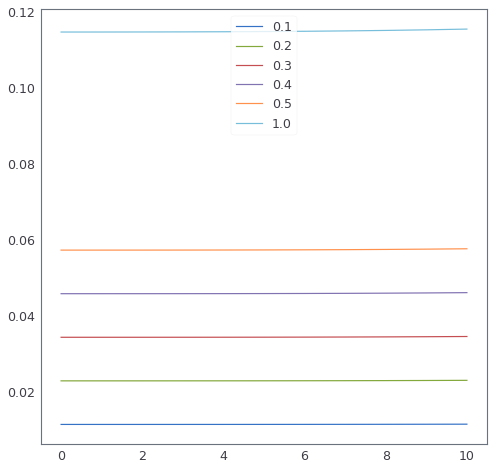

In [11]:
plt.figure(figsize=(8,8))
for irc in range(len(rrc)):
    plt.plot(np.array(eev[irc])*mt.C.kpc.express(mt.C.km),label=str(rrc[irc]))
plt.legend()
plt.show()

In [12]:
prue = ""
for irc in range(len(rrc)):
    prue = prue + " & " +"$\pm$"+ str(np.round(seev[irc][-1]*mt.C.kpc.express(mt.C.km),decimals=3))
print prue

 & $\pm$0.004 & $\pm$0.007 & $\pm$0.011 & $\pm$0.014 & $\pm$0.018 & $\pm$0.037


In [13]:
0.0199009793340327*2.65860467535e+15/100.*100*10*mt.C.s.express(mt.C.Myr)

16.76579863535347

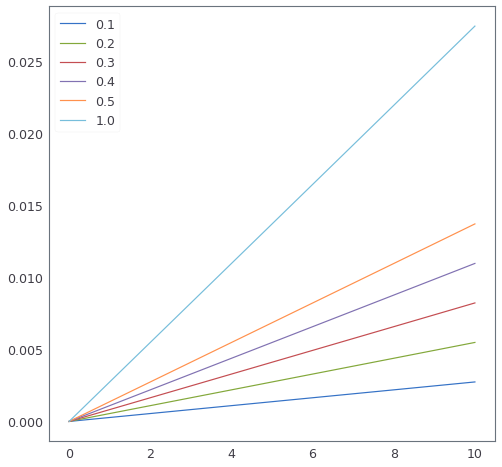

In [14]:
plt.figure(figsize=(8,8))
for irc in range(len(rrc)):
    plt.plot(eer[irc],label=str(rrc[irc]))
plt.legend()
plt.show()

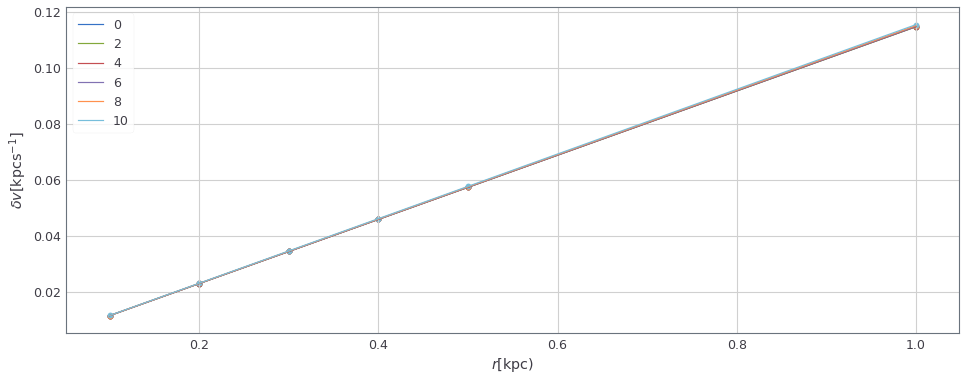

In [15]:
plt.figure(figsize=(16,6))
for ic in range(0,11,2):
    plt.plot(rrc,[ev[ic]*mt.C.kpc.express(mt.C.km) for ev in eev],label=str(ic))
    plt.scatter(rrc,[ev[ic]*mt.C.kpc.express(mt.C.km) for ev in eev])
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
#plt.ylim(.12e-17,.16e-17)
plt.xlabel("$r [\mathrm{kpc)}$")
plt.ylabel("$\delta v [\mathrm{kpcs^{-1}}]$")
plt.grid(True)
plt.show()

In [16]:
np.shape(parts)

(6, 11, 120, 6)

reload(oc)

oocct=[[oc.MCMCfit(parts[irc][ic],lsrs[ic]) for ic in range(11)] for irc in range(len(rrc))]

In [17]:
oocct = np.load('/fs/nas14/other0/cbenitez/evolsOC/MCMCruns/oocct_p1p2p3p4p5p10.npy')

np.save('/fs/nas14/other0/cbenitez/evolsOC/MCMCruns/oocct_p1p2p3p4p5p10',oocct)

In [18]:
[[oocct[irc][ic].flag_conv for ic in range(11)] for irc in range(len(rrc))]

[[True, True, True, True, True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True, True, True, True, True]]

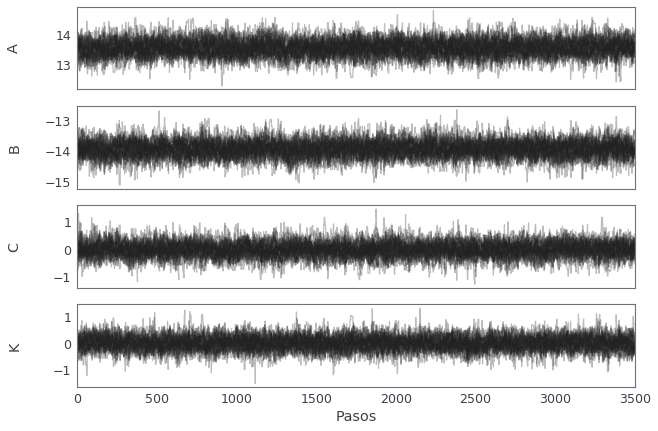

In [19]:
oc.plot_walks(oocct[1][-2].sampler,discard_first=1000)

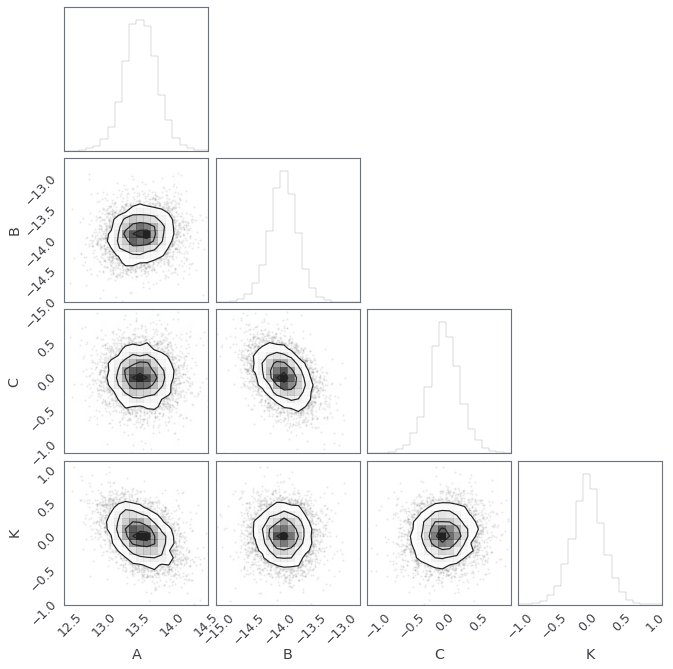

In [20]:
oc.plot_corner(oocct[1][-2].sampler)

In [21]:
Theta_0 = np.array([13.55037486116183, -13.938877070529985,0.,0.])

In [22]:
tt = [0.0199009793340327*2.65860467535e+15*mt.C.s.express(mt.C.Myr)*ti for ti in range(11)]

In [23]:
rrc

[0.1, 0.2, 0.3, 0.4, 0.5, 1.0]

In [24]:
ylabs = ["A", "B", "C", "K"]
irc1 = 
irc2 = 3
fig, axes = plt.subplots(2, 2,figsize=(14,5),sharex=True)
for i in range(2):
    for j in range(2):
        #axes[i,j].set_yticks([np.round(Theta_0[i+j*2]+e,decimals=4) for e in [-.09,-.06,-.03,0.,.03,.06,.09]])
        #axes[i,j].set_yticklabels([np.round(Theta_0[i+j*2]+e,decimals=4) for e in [-.09,-.06,-.03,0.,.03,.06,.09]])
        #axes[i,j].set_ylim(Theta_0[i+j*2]-.085,Theta_0[i+j*2]+.085)
        axes[i,j].set_xlim(-.5,17)
        axes[i,j].set_ylabel(ylabs[i+j*2]+" [kms$^{-1}$kpc$^{-1}$]",labelpad=22-j*11)
        axes[i,j].hlines(Theta_0[i+j*2],-2,17,linestyle="--")
        axes[i,j].set_xlabel("t  [Myr]",labelpad=22-j*11)
        axes[i,j].errorbar(tt,[oocct[irc1][ti].theta[i+2*j] for ti in range(11)], yerr=[oocct[irc1][ti].std[i+2*j] for ti in range(11)],marker="o")
        axes[i,j].errorbar(tt,[oocct[irc2][ti].theta[i+2*j] for ti in range(11)], yerr=[oocct[irc2][ti].std[i+2*j] for ti in range(11)],marker="s")
plt.subplots_adjust(hspace=0,wspace=.35)

SyntaxError: invalid syntax (<ipython-input-24-561b9dd283ca>, line 2)

In [25]:
rrc

[0.1, 0.2, 0.3, 0.4, 0.5, 1.0]

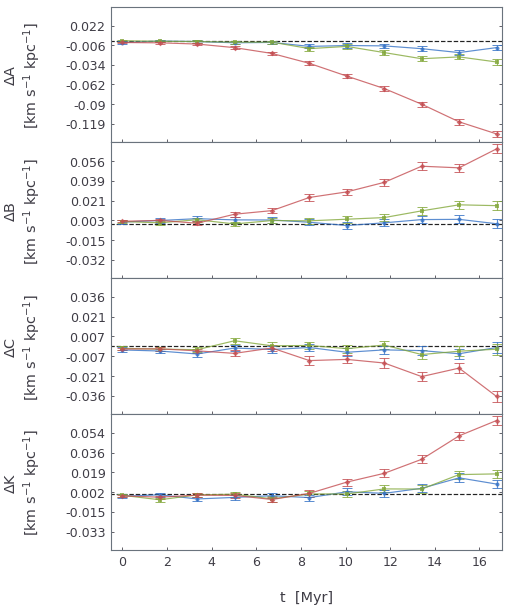

In [35]:
ylabs = ["A", "B", "C", "K"]
irc1 = 3
irc2 = 4
irc3 = 5
fig, axes = plt.subplots(4, 1,figsize=(7,10),sharex=True)
j=0
for i in range(4):
    ymax = max(.05,max([oocct[irc3][ti].theta[i+2*j]-Theta_0[i+2*j] for ti in range(11)])*1.1)
    ymin = min(-.05,min([oocct[irc3][ti].theta[i+2*j]-Theta_0[i+2*j] for ti in range(11)])*1.1)
    axes[i].set_yticks([ymin+(ymax-ymin)/7.*e for e in range(7)])
    axes[i].set_yticklabels([np.round(ymin+(ymax-ymin)/7.*e,decimals=3) for e in range(7)])
    axes[i].set_ylim(ymin+.001,ymax-.001)
    axes[i].set_xlim(-.5,17)
    axes[i].set_ylabel("$\Delta$"+ylabs[i+j*2]+" \n[km s$^{-1}$ kpc$^{-1}$]",labelpad=22-j*11)
    axes[i].hlines(0,-2,17,linestyle="--")
    axes[i].set_xlabel("t  [Myr]",labelpad=22-j*11)
    axes[i].errorbar(tt,[oocct[irc1][ti].theta[i+2*j]-Theta_0[i+2*j] for ti in range(11)], yerr=[oocct[irc1][ti].std[i+2*j] for ti in range(11)],marker="o",ms=4,alpha=.8,capsize=5,capthick=1)
    axes[i].errorbar(tt,[oocct[irc2][ti].theta[i+2*j]-Theta_0[i+2*j] for ti in range(11)], yerr=[oocct[irc2][ti].std[i+2*j] for ti in range(11)],marker="s",ms=4,alpha=.8,capsize=5,capthick=1)
    axes[i].errorbar(tt,[oocct[irc3][ti].theta[i+2*j]-Theta_0[i+2*j] for ti in range(11)], yerr=[oocct[irc3][ti].std[i+2*j] for ti in range(11)],marker="D",ms=4,alpha=.8,capsize=5,capthick=1)
    axes[i].tick_params(which='both',direction='in',right=True,length=3)
plt.subplots_adjust(hspace=0,wspace=.35)



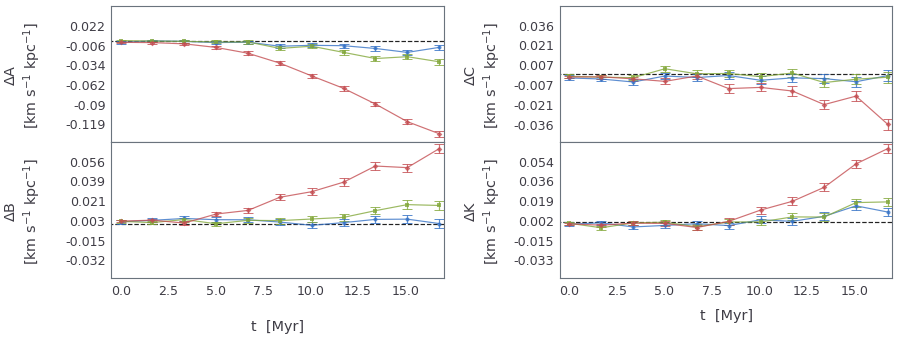

In [27]:
ylabs = ["A", "B", "C", "K"]
irc1 = 3
irc2 = 4
irc3 = 5
fig, axes = plt.subplots(2, 2,figsize=(14,5),sharex=True)
for i in range(2):
    for j in range(2):
        ymax = max(.05,max([oocct[irc3][ti].theta[i+2*j]-Theta_0[i+2*j] for ti in range(11)])*1.1)
        ymin = min(-.05,min([oocct[irc3][ti].theta[i+2*j]-Theta_0[i+2*j] for ti in range(11)])*1.1)
        axes[i,j].set_yticks([ymin+(ymax-ymin)/7.*e for e in range(7)])
        axes[i,j].set_yticklabels([np.round(ymin+(ymax-ymin)/7.*e,decimals=3) for e in range(7)])
        axes[i,j].set_ylim(ymin+.001,ymax-.001)
        #axes[i,j].set_yticks([-.03+.01*e for e in range(7)])
        #axes[i,j].set_yticklabels([-.03+.01*e for e in range(7)])
        #axes[i,j].set_ylim(-.029,.029)
        axes[i,j].set_xlim(-.5,17)
        axes[i,j].set_ylabel("$\Delta$"+ylabs[i+j*2]+" \n[km s$^{-1}$ kpc$^{-1}$]",labelpad=22-j*11)
        axes[i,j].hlines(0,-2,17,linestyle="--")
        axes[i,j].set_xlabel("t  [Myr]",labelpad=22-j*11)
        axes[i,j].errorbar(tt,[oocct[irc1][ti].theta[i+2*j]-Theta_0[i+2*j] for ti in range(11)], yerr=[oocct[irc1][ti].std[i+2*j] for ti in range(11)],marker="o",ms=4,alpha=.8,capsize=5,capthick=1)
        axes[i,j].errorbar(tt,[oocct[irc2][ti].theta[i+2*j]-Theta_0[i+2*j] for ti in range(11)], yerr=[oocct[irc2][ti].std[i+2*j] for ti in range(11)],marker="s",ms=4,alpha=.8,capsize=5,capthick=1)
        axes[i,j].errorbar(tt,[oocct[irc3][ti].theta[i+2*j]-Theta_0[i+2*j] for ti in range(11)], yerr=[oocct[irc3][ti].std[i+2*j] for ti in range(11)],marker="D",ms=4,alpha=.8,capsize=5,capthick=1)
plt.subplots_adjust(hspace=0,wspace=.35)


In [44]:
max(oocct[-1][6].cc_galac[:,0])

1.1523059642924558

In [29]:
np.shape(oocct)

(6, 11)

In [30]:
[max([max(oocct[irc][ic].theta-Theta_0) for ic in range(11)]) for irc in range(len(rrc))]

[0.010940933668930342,
 0.006512057437205954,
 0.008718601333342235,
 0.014241480814221358,
 0.017701716949289542,
 0.06739808738381114]

In [31]:
[[(oocct[irc][ic].theta-Theta_0) for ic in range(11)] for irc in range(len(rrc))]

[[array([ 0.0002701 , -0.00594602, -0.00330995, -0.00144788]),
  array([ 0.00812336,  0.00805408, -0.00384321,  0.00723403]),
  array([-0.00275598, -0.00033153, -0.00126257, -0.00636123]),
  array([-0.01031736, -0.00545134, -0.00330374,  0.00865087]),
  array([ 0.01058537,  0.00426517, -0.00958824, -0.01590087]),
  array([-0.002729  ,  0.01094093, -0.01718216, -0.00034576]),
  array([-0.00372767, -0.00331073, -0.0004172 ,  0.009094  ]),
  array([-0.00593829,  0.00226393, -0.00990739, -0.00328414]),
  array([ 0.00509956, -0.0134491 ,  0.00074863, -0.00880884]),
  array([ 0.00936555,  0.00452489,  0.0040749 , -0.00145993]),
  array([-0.00679761, -0.00383597,  0.00395651, -0.00243777])],
 [array([ 7.51540245e-04, -2.87092915e-03,  1.45709176e-03, -7.80448325e-05]),
  array([-1.60373821e-04, -6.52740631e-05, -3.41850799e-04, -7.41906839e-03]),
  array([-0.00677454,  0.00113612,  0.00474388, -0.0048424 ]),
  array([-0.00361124,  0.00328568,  0.00375641,  0.00494702]),
  array([-0.00044428, 